In [18]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Read generated CSV file into a dataframe using Report Number as an index
crash_data = pd.read_csv("../Resources/Montgomery_Crash_Data.csv", index_col='Report Number')
crash_data['Crash Date/Time'] = pd.to_datetime(crash_data['Crash Date/Time'])
display(crash_data.head())

,Crash Date/Time,Weather,Surface Condition,Injury Severity,Vehicle ID,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,ACRS Report Type,geometry
Report Number,,,,,,,,,,,,
MCP26370040,2021-04-04 12:00:00,CLEAR,DRY,NO APPARENT INJURY,88FCD6CE-A85A-4CBD-9BEC-3B6E6DCF16BB,2021,MITS,DELOCA,39.057201,-77.293102,Property Damage Crash,POINT (-77.29310223 39.05720146)
MCP3221002N,2023-12-04 21:37:00,CLEAR,DRY,SUSPECTED MINOR INJURY,6E02796A-26BA-45CD-88B1-13EEDF7EC29C,2015,TOYOTA,RAV4,39.058683,-77.290703,Injury Crash,POINT (-77.29070333 39.05868333)
MCP9399002C,2024-07-17 21:27:00,CLOUDY,WET,SUSPECTED MINOR INJURY,70D8BF87-2BB7-4092-9267-0AD9E7E42978,2004,JEEP,GRAND CHEROKEE,39.063110,-77.295795,Injury Crash,POINT (-77.29579535000001 39.06310977)
MCP28240026,2016-06-21 09:49:00,RAIN,WET,NO APPARENT INJURY,334BEA8D-C367-4DFB-8A70-93750F1BCFBC,2008,HOND,4S,39.063192,-77.296605,Property Damage Crash,POINT (-77.296605 39.06319167)
MCP2497000L,2016-12-05 06:55:00,RAIN,WET,SUSPECTED MINOR INJURY,B8B60239-5172-4024-846A-0EAFD3A7E0B2,2004,VOLVO,S60,39.063220,-77.295740,Injury Crash,POINT (-77.29574 39.06322)


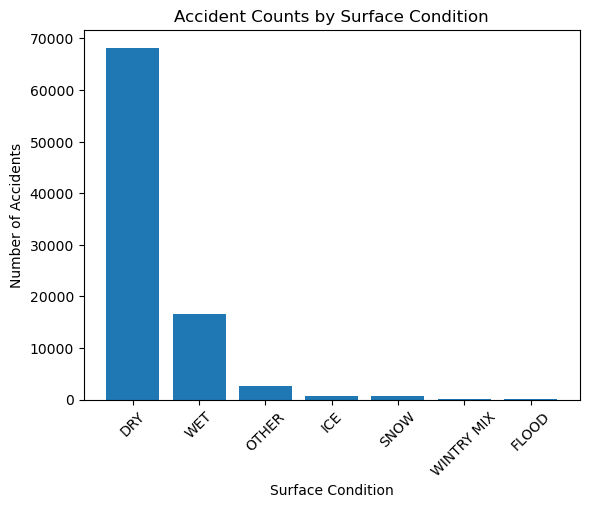

In [20]:
# Accident count by surface condition
surface_condition_counts = crash_data['Surface Condition'].value_counts()

# Plot accident counts
plt.bar(surface_condition_counts.index, surface_condition_counts.values)
plt.xlabel('Surface Condition')
plt.ylabel('Number of Accidents')
plt.title('Accident Counts by Surface Condition')
plt.xticks(rotation=45)
plt.show()

The histogram of road conditions for crash data suggests:
- Most of the accidents happened on DRY conditions
- Wet roads have contributed to more accidents as compare to SNOW
- Extreme road conditions like ICE and FLOOD do not have many crashes attributed.

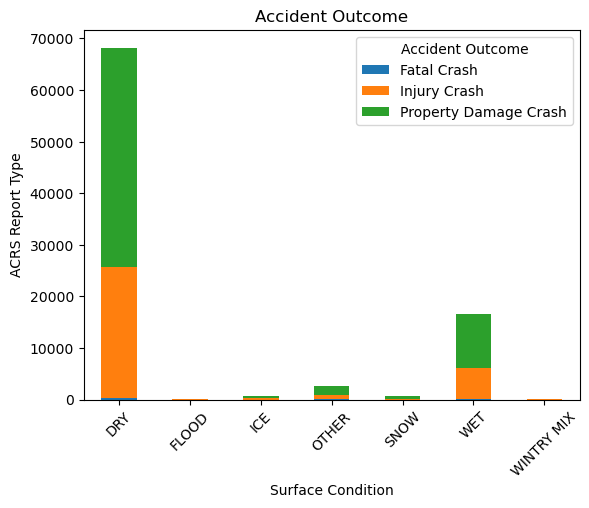

In [21]:
# Injury Severity counts by surface condition
injury_severity_counts = crash_data.groupby('Surface Condition')['ACRS Report Type'].value_counts().unstack()

# Plot injury severity counts (transpose to get Surface Condition on x-axis)
injury_severity_counts.plot(kind='bar', stacked=True)
plt.xlabel('Surface Condition')
plt.ylabel('ACRS Report Type')
plt.title('Accident Outcome')
plt.xticks(rotation=45)
plt.legend(title='Accident Outcome')
plt.show()

Analysis based on `ACRS Report Type` is in sync with the histogram based on `Surface Condition` 

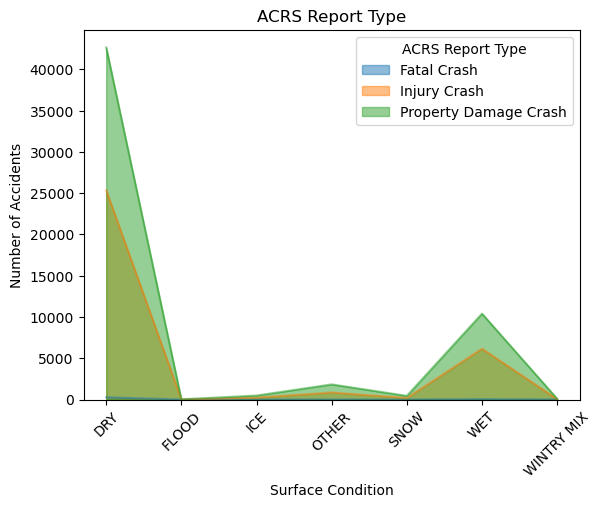

In [22]:
# Plot injury severity counts (transpose to get Surface Condition on x-axis)
injury_severity_counts.plot(kind='area', stacked=False)
plt.xlabel('Surface Condition')
plt.ylabel('Number of Accidents')
plt.title('ACRS Report Type')
plt.xticks(rotation=45)
plt.legend(title='ACRS Report Type')
plt.show()

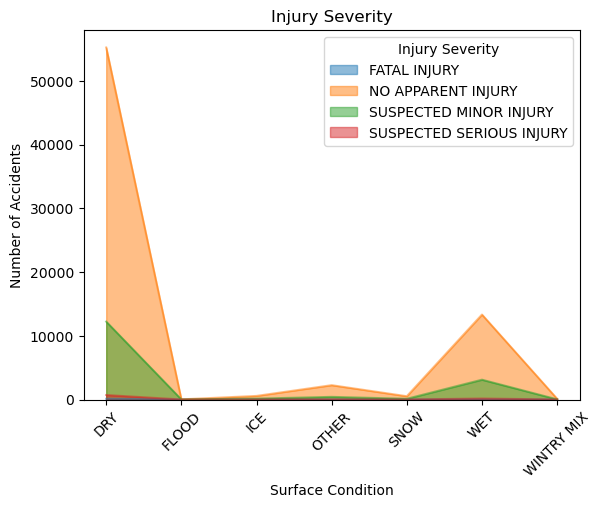

In [23]:
# Injury Severity counts by surface condition
injury_severity_counts = crash_data.groupby('Surface Condition')['Injury Severity'].value_counts().unstack()

# Plot injury severity counts (transpose to get Surface Condition on x-axis)
injury_severity_counts.plot(kind='area', stacked=False)
plt.xlabel('Surface Condition')
plt.ylabel('Number of Accidents')
plt.title('Injury Severity')
plt.xticks(rotation=45)
plt.legend(title='Injury Severity')
plt.show()

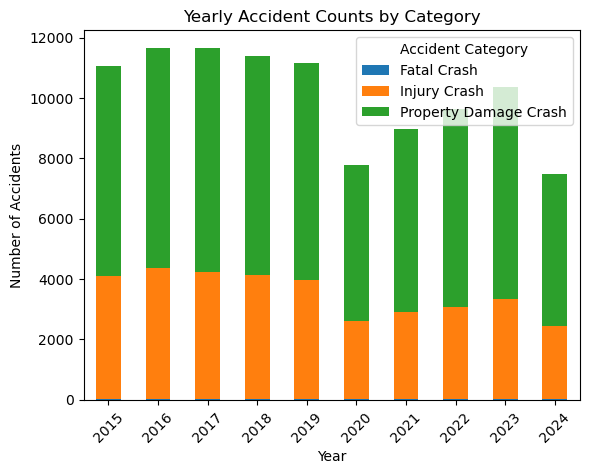

In [24]:
# Create a new column 'Year' from 'Crash Date/Time'
crash_data['Year'] = pd.to_datetime(crash_data['Crash Date/Time']).dt.year

# Group by year and ACRS Report Type
grouped_data = crash_data.groupby(['Year', 'ACRS Report Type']).size().unstack()

# Plot accident counts for each year and ACRS Report Type
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Yearly Accident Counts by Category')
plt.xticks(rotation=45)
plt.legend(title='Accident Category')
plt.show()

Annual accidents count based on `ACRS Report Type` suggests that there are more Property Damage crashes then Fatal crashes.

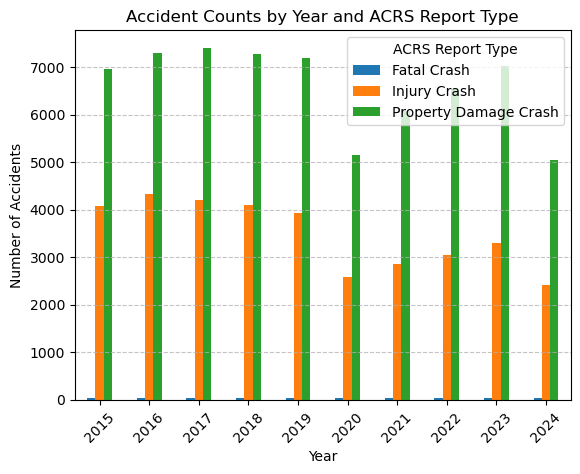

In [25]:
# Group by year and ACRS Report Type
grouped_data = crash_data.groupby(['Year', 'ACRS Report Type']).size().unstack()

# Plot accident counts for each year and ACRS Report Type
grouped_data.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Accident Counts by Year and ACRS Report Type')
plt.xticks(rotation=45)
plt.legend(title='ACRS Report Type')
plt.grid(axis='y', linestyle='--', alpha=0.75)
plt.show()

This unstacked parallel bar chart provide better visualization on comparison of crashes based on `ACRS Report Type` column.

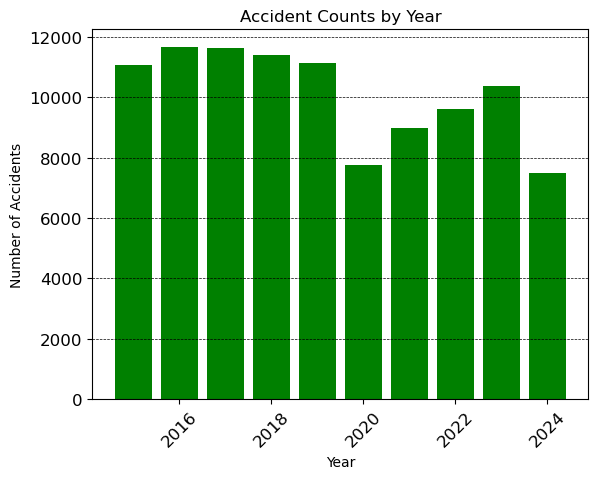

In [26]:
# Group accidents by year to get an idea of the trend
accident_counts_by_year = crash_data.groupby('Year').size()

# Plot accident counts by year
plt.bar(accident_counts_by_year.index, accident_counts_by_year.values, color='green') 
plt.grid(True, linestyle='--', linewidth=0.5, color='black', which='both', axis='y') 

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Accident Counts by Year')

plt.xticks(rotation=45, fontsize=12) 
plt.yticks(fontsize=12)  

plt.show()

This accident counts by year histogram is in alignment with the analysis done in `datetime_analysis.ipynb` notebook.

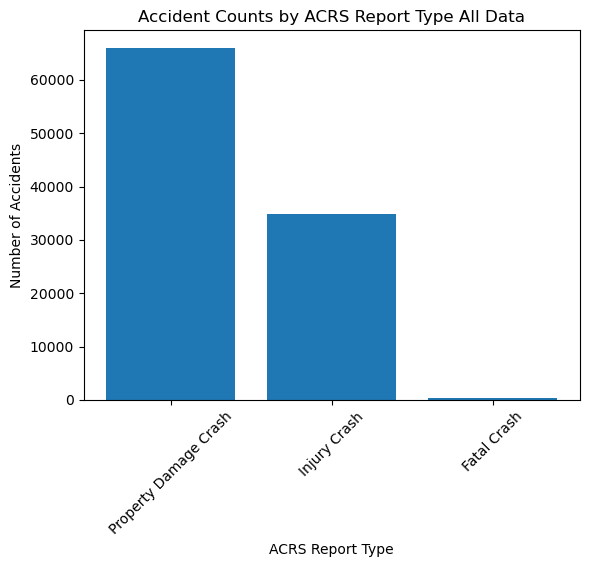

In [28]:
# Accident count by ACRS Report Type
acrs_report_type_counts = crash_data['ACRS Report Type'].value_counts()

# Plot accident counts
plt.bar(acrs_report_type_counts.index, acrs_report_type_counts.values)
plt.xlabel('ACRS Report Type')
plt.ylabel('Number of Accidents')
plt.title('Accident Counts by ACRS Report Type All Data')
plt.xticks(rotation=45)
plt.show()